<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Python_para_finan%C3%A7as_risco_de_a%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - risco de ações

Desvio padrão: std ~ risco

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Valores de fechamento por dia

In [ ]:
import pandas as pd
from pandas_datareader import data

acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

acoes_df.dropna(inplace=True)
acoes_df.to_csv('acoes.csv')

dataset_raw = pd.read_csv('acoes.csv')

days_bolsa = 246

dataset_raw

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,2021-01-28,24.610001,19.240000,87.970001,26.190001,29.459999,113.910004


In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1503 non-null   datetime64[ns]
 1   GOL     1503 non-null   float64       
 2   CVC     1503 non-null   float64       
 3   WEGE    1503 non-null   float64       
 4   MGLU    1503 non-null   float64       
 5   TOTS    1503 non-null   float64       
 6   BOVA    1503 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 82.3 KB


In [ ]:
dataset.describe()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,14.908104,32.315944,23.147071,5.391807,13.602818,73.204955
std,10.203350,16.053375,17.902067,7.036146,5.959124,20.867653
min,1.160000,6.490000,9.884615,0.030585,7.156402,36.450001
25%,6.915000,18.059999,12.707692,0.212500,9.837974,55.020000
50%,12.370000,27.750000,17.115383,2.464062,10.739594,72.070000
75%,21.045000,47.180000,22.400000,7.375781,15.431667,92.130001
max,43.790001,64.800003,92.209999,27.450001,31.070000,120.400002


## Cálculo dos retornos anuais

Logarítimica: comparar mesma ação em períodos diferentes

In [ ]:
dctYearlyRL = {}

dfFirstLastDayYear = pd.DataFrame(columns=dataset.columns)
actions = list(dataset.columns[1:])
for year in range(2015, 2021):
    mask = dataset['Date'].dt.year==year
    
    firstValuesYear = dataset.loc[mask].iloc[0,1:]
    lastValuesYear = dataset.loc[mask].iloc[-1,1:]
    dfFirstLastDayYear=dfFirstLastDayYear.append(dataset.loc[mask].iloc[[0,-1]])
    dctYearlyRL[str(year)] = list(zip(actions,(lastValuesYear/firstValuesYear).apply(pd.to_numeric).apply(np.log)))
dfFirstLastDayYear

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
245,2015-12-30,2.520000,13.500000,11.500000,0.068945,10.323718,42.130001
246,2016-01-04,2.410000,12.530000,11.261538,0.070117,10.210599,41.099998
494,2016-12-29,4.620000,23.700001,11.923076,0.414726,7.998136,58.240002
495,2017-01-02,4.510000,23.020000,11.615384,0.397304,7.848421,57.630001
748,2017-12-29,14.600000,48.500000,18.546152,2.506875,9.944438,73.820000
749,2018-01-02,15.190000,49.880001,19.246153,2.478125,10.030941,75.099998
993,2018-12-28,25.100000,61.180000,17.540001,5.658437,9.032837,84.599998
994,2019-01-02,25.450001,61.099998,17.980000,5.812187,9.531889,87.900002
1240,2019-12-30,36.799999,43.799999,34.660000,11.925000,21.516666,111.230003


In [ ]:
dfYearlyRL = pd.DataFrame(dctYearlyRL).apply(lambda x: [y[1] for y in x])
dfYearlyRL.index = actions
dfYearlyRL

,2015,2016,2017,2018,2019,2020
GOL,-1.783124,0.650768,1.174724,0.502231,0.368782,-0.399029
CVC,-0.118606,0.637349,0.745200,0.204200,-0.332878,-0.775877
WEGE,-0.029656,0.057082,0.467932,-0.092827,0.656326,0.765125
MGLU,-1.216922,1.777453,1.842091,0.825645,0.718680,0.704636
TOTS,-0.142993,-0.244218,0.236701,-0.104808,0.814185,0.219928
BOVA,-0.114904,0.348564,0.247586,0.119114,0.235400,0.006196


## Variância, desvio padrão, coeficiente de variação

$$ \textrm{coefVariacao} = \frac{\sigma}{\mu} $$

In [ ]:
dfYearlyRL.mean(axis=1)

GOL     0.085725
CVC     0.059898
WEGE    0.303997
MGLU    0.775264
TOTS    0.129799
BOVA    0.140326
dtype: float64

In [ ]:
dfYearlyRL.var(axis=1,ddof=0)

GOL     0.914396
CVC     0.284762
WEGE    0.115568
MGLU    1.020339
TOTS    0.126213
BOVA    0.024582
dtype: float64

In [ ]:
dfYearlyRL.std(axis=1,ddof=0)

GOL     0.956241
CVC     0.533631
WEGE    0.339953
MGLU    1.010118
TOTS    0.355265
BOVA    0.156786
dtype: float64

In [ ]:
taxas_cvc = np.array([-11.86, 63.73, 74.52, 20.42, -33.29, -77.5877])
assert taxas_cvc.mean() == (taxas_cvc.sum() / len(taxas_cvc))
assert taxas_cvc.var() == ((taxas_cvc - taxas_cvc.mean()) ** 2).sum() / len(taxas_cvc)
assert taxas_cvc.std() == np.sqrt(((taxas_cvc - taxas_cvc.mean()) ** 2).sum() / len(taxas_cvc))
# test = np.array([1, 2, 3, 4, 5, 6])
test = dfYearlyRL.iloc[0,:].values
assert stats.variation(test) == test.std()/test.mean()
assert stats.variation(dfYearlyRL.iloc[0,:]) == dfYearlyRL.std(axis=1, ddof=0)[0]/dfYearlyRL.mean(axis=1)[0]
# stats.variation(test)

Indicadores com série histórica dos $n$ últimos dias

In [ ]:
dfLastDays_mean = pd.DataFrame()
dfLastDays_std = pd.DataFrame()
dfLastDays_coefVariation = pd.DataFrame()
lastDays = [5,10,25,75,125,250,500,750,1250]
for lastDay in lastDays:
    dfLastDays_mean[str(lastDay)] = dataset.iloc[:,1:].tail(lastDay).mean()
    dfLastDays_std[str(lastDay)] = dataset.iloc[:,1:].tail(lastDay).std(ddof=0)
    dfLastDays_coefVariation[str(lastDay)] = dataset.iloc[:,1:].tail(lastDay).std(ddof=0) / dataset.iloc[:,1:].tail(lastDay).mean()


dfLastDays_mean = dfLastDays_mean.T.add_suffix('_mean')
dfLastDays_std = dfLastDays_std.T.add_suffix('_std')
dfLastDays_coefVariation = dfLastDays_coefVariation.T.add_suffix('_coefVariation')

dfLastDays = pd.concat([dfLastDays_mean,dfLastDays_std,dfLastDays_coefVariation],axis=1)
dfLastDays.index.name = 'lastDays'
dfLastDays

,GOL_mean,CVC_mean,WEGE_mean,MGLU_mean,TOTS_mean,BOVA_mean,GOL_std,CVC_std,WEGE_std,MGLU_std,TOTS_std,BOVA_std,GOL_coefVariation,CVC_coefVariation,WEGE_coefVariation,MGLU_coefVariation,TOTS_coefVariation,BOVA_coefVariation
lastDays,,,,,,,,,,,,,,,,,,
5,23.294000,18.418000,87.992000,25.858000,29.404000,112.718001,0.871358,0.656548,1.009445,0.217016,0.665030,1.132987,0.037407,0.035647,0.011472,0.008393,0.022617,0.010052
10,23.301000,19.096000,88.584000,25.259000,29.327000,114.121695,0.662201,0.847068,1.505312,0.781696,0.637496,1.699685,0.028419,0.044358,0.016993,0.030947,0.021738,0.014894
25,23.655600,19.456800,83.859600,24.762400,28.424800,115.285478,0.658624,0.750854,6.697563,0.854018,1.000516,2.468547,0.027842,0.038591,0.079866,0.034488,0.035199,0.021412
75,22.294533,17.541067,79.773067,24.740733,27.793200,106.017026,3.160507,2.807131,5.973391,1.095954,1.264420,8.722458,0.141762,0.160032,0.074880,0.044298,0.045494,0.082274
125,20.811360,17.884800,74.300480,23.549060,27.756240,102.217576,3.131719,2.459382,8.266560,1.808875,1.158294,8.398873,0.150481,0.137512,0.111259,0.076813,0.041731,0.082167
250,20.014040,18.936335,58.467240,18.799540,24.589853,95.667388,7.076986,6.756763,17.688239,5.445667,4.135205,13.683089,0.353601,0.356815,0.302532,0.289670,0.168167,0.143028
500,25.749440,35.305888,40.780540,13.414510,20.512171,96.840874,8.546550,17.552115,21.951865,6.857907,5.681478,10.701665,0.331912,0.497144,0.538293,0.511231,0.276981,0.110508
750,22.671133,40.744085,33.156752,10.227527,16.832549,90.972236,8.609404,16.706466,20.924821,7.208968,6.984950,12.395393,0.379752,0.410034,0.631088,0.704859,0.414967,0.136255
1250,16.563064,35.680939,25.259054,6.459752,14.017416,78.287598,10.333271,15.540314,18.930335,7.260295,6.439705,19.158888,0.623874,0.435535,0.749448,1.123928,0.459407,0.244724


In [ ]:
dfYearlyRL.std(axis=1, ddof=0)/dfYearlyRL.mean(axis=1)

GOL     11.154713
CVC      8.908971
WEGE     1.118279
MGLU     1.302935
TOTS     2.737038
BOVA     1.117295
dtype: float64

## Cálculos com todas as ações - risco médio anual

In [ ]:
dataset.drop(columns=['Date'], inplace=True)
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
1498,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,24.610001,19.240000,87.970001,26.190001,29.459999,113.910004


In [ ]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1498,-0.003954,-0.046210,0.006960,0.020008,0.013445,-0.011183
1499,-0.020291,-0.050626,0.007818,-0.009615,-0.001327,-0.001855
1500,0.036920,0.033257,-0.002923,0.001553,-0.045500,0.000000
1501,0.068606,0.067703,-0.008118,0.015510,0.025052,0.008321


In [ ]:
taxas_retorno.std(ddof=0) * 100

GOL     5.127450
CVC     3.480398
WEGE    2.228642
MGLU    4.167106
TOTS    2.439113
BOVA    1.714883
dtype: float64

In [ ]:
taxas_retorno.std(ddof=0) * days_bolsa

GOL     12.613526
CVC      8.561779
WEGE     5.482459
MGLU    10.251082
TOTS     6.000217
BOVA     4.218611
dtype: float64

In [ ]:
taxas_retorno.std() * np.sqrt(days_bolsa)  # Anualizar

GOL     0.804477
CVC     0.546061
WEGE    0.349665
MGLU    0.653803
TOTS    0.382687
BOVA    0.269058
dtype: float64

## Correlação entre taxas de retorno de ações

In [ ]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
1498,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,24.610001,19.240000,87.970001,26.190001,29.459999,113.910004


In [ ]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1498,-0.003954,-0.046210,0.006960,0.020008,0.013445,-0.011183
1499,-0.020291,-0.050626,0.007818,-0.009615,-0.001327,-0.001855
1500,0.036920,0.033257,-0.002923,0.001553,-0.045500,0.000000
1501,0.068606,0.067703,-0.008118,0.015510,0.025052,0.008321


Covariância

$$ \mathrm{cov}(x,y) = \frac{\sum{(x_i-\bar{x})\cdot(y_i-\bar{y})}}{n-1} $$

$$ \mathrm{corr}(x,y) = \frac{\mathrm{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
idx = 0
idy = 1
n = taxas_retorno.shape[0]
xi = taxas_retorno.iloc[:,idx]
yi = taxas_retorno.iloc[:,idy]
# first row without variation
cov_xy = ((xi-xi.mean()) * (yi-yi.mean())).sum()/(n-1-1)
assert np.allclose(cov_xy, taxas_retorno.cov().iloc[0,1])

corr_xy = cov_xy/(xi.std()*yi.std())
assert np.allclose(corr_xy, taxas_retorno.corr().iloc[0,1])

In [ ]:
taxas_retorno.cov()

# cov >0 diretamente proporcionais
# cov <0 inversamente proporcionais
# cov =0 independentes

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.002631,0.000905,0.000353,0.000683,0.000383,0.000518
CVC,0.000905,0.001212,0.000235,0.000462,0.000257,0.000332
WEGE,0.000353,0.000235,0.000497,0.000274,0.000210,0.000204
MGLU,0.000683,0.000462,0.000274,0.001738,0.000294,0.000322
TOTS,0.000383,0.000257,0.000210,0.000294,0.000595,0.000202
BOVA,0.000518,0.000332,0.000204,0.000322,0.000202,0.000294


[Empresas BOVA](http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br)

In [ ]:
# url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br'
# @ 30/01/2021
df_bova = pd.DataFrame(
    columns=["Código ","Ação","Tipo","Qtde. Teórica (1)","Part. (%) (2)"],
    data=[
    ["ABEV3","AMBEV S/A","ON EJ",4355174839,"3,112"],
    ["AZUL4","AZUL","PN N2",327283207,"0,587"],
    ["B3SA3","B3","ON NM",1930877944,"5,418"],
    ["BBAS3","BRASIL","ON NM",1283197221,"2,274"],
    ["BBDC3","BRADESCO","ON EJ N1",1147260246,"1,268"],
    ["BBDC4","BRADESCO","PN EJ N1",4261649634,"5,282"],
    ["BBSE3","BBSEGURIDADE","ON NM",671584841,"0,909"],
    ["BEEF3","MINERVA","ON NM",239331676,"0,111"],
    ["BPAC11","BTGP BANCO","UNT N2",236093794,"1,013"],
    ["BRAP4","BRADESPAR","PN N1",222075664,"0,646"],
    ["BRDT3","PETROBRAS BR","ON EJ NM",1164958126,"1,177"],
    ["BRFS3","BRF SA","ON NM",811759800,"0,817"],
    ["BRKM5","BRASKEM","PNA N1",264640575,"0,285"],
    ["BRML3","BR MALLS PAR","ON NM",843728684,"0,381"],
    ["BTOW3","B2W DIGITAL","ON NM",201549295,"0,696"],
    ["CCRO3","CCR SA","ON NM",1115695556,"0,686"],
    ["CIEL3","CIELO","ON EJ NM",1112196638,"0,203"],
    ["CMIG4","CEMIG","PN N1",969723092,"0,634"],
    ["COGN3","COGNA ON","ON NM",1847994874,"0,391"],
    ["CPFE3","CPFL ENERGIA","ON NM",187714249,"0,279"],
    ["CPLE6","COPEL","PNB EJ N1",128297543,"0,439"],
    ["CRFB3","CARREFOUR BR","ON NM",391758726,"0,347"],
    ["CSAN3","COSAN","ON NM",129314042,"0,447"],
    ["CSNA3","SID NACIONAL","ON",642398790,"0,934"],
    ["CVCB3","CVC BRASIL","ON NM",172756818,"0,162"],
    ["CYRE3","CYRELA REALT","ON NM",281154098,"0,378"],
    ["ECOR3","ECORODOVIAS","ON NM",171109276,"0,104"],
    ["EGIE3","ENGIE BRASIL","ON EDJ NM",254792279,"0,511"],
    ["ELET3","ELETROBRAS","ON N1",358018408,"0,6"],
    ["ELET6","ELETROBRAS","PNB N1",242977127,"0,411"],
    ["EMBR3","EMBRAER","ON NM",736143105,"0,298"],
    ["ENBR3","ENERGIAS BR","ON NM",250403441,"0,225"],
    ["ENEV3","ENEVA","ON NM",287844670,"0,816"],
    ["ENGI11","ENERGISA","UNT N2",250679709,"0,599"],
    ["EQTL3","EQUATORIAL","ON NM",1010286085,"1,068"],
    ["EZTC3","EZTEC","ON NM",95756217,"0,188"],
    ["FLRY3","FLEURY","ON NM",303800430,"0,375"],
    ["GGBR4","GERDAU","PN EJ N1",995903643,"1,112"],
    ["GNDI3","INTERMEDICA","ON NM",588176771,"2,104"],
    ["GOAU4","GERDAU MET","PN EJ N1",693699918,"0,357"],
    ["GOLL4","GOL","PN N2",137725788,"0,157"],
    ["HAPV3","HAPVIDA","ON NM",1085256490,"0,756"],
    ["HGTX3","CIA HERING","ON EDJ NM",126186408,"0,099"],
    ["HYPE3","HYPERA","ON EJ NM",410147968,"0,641"],
    ["IGTA3","IGUATEMI","ON NM",85796919,"0,146"],
    ["IRBR3","IRBBRASIL RE","ON NM",1255327516,"0,469"],
    ["ITSA4","ITAUSA","PN N1",4515538171,"2,419"],
    ["ITUB4","ITAUUNIBANCO","PN N1",4757466114,"6,868"],
    ["JBSS3","JBS","ON NM",1500315048,"1,621"],
    ["JHSF3","JHSF PART","ON NM",288952690,"0,103"],
    ["KLBN11","KLABIN S/A","UNT N2",788757519,"0,953"],
    ["LAME4","LOJAS AMERIC","PN N1",835451478,"1,003"],
    ["LCAM3","LOCAMERICA","ON EJ NM",323763077,"0,433"],
    ["LREN3","LOJAS RENNER","ON EJ NM",785417914,"1,562"],
    ["MGLU3","MAGAZ LUIZA","ON EJ NM",2668955512,"3,041"],
    ["MRFG3","MARFRIG","ON NM",368864634,"0,244"],
    ["MRVE3","MRV","ON NM",298796441,"0,259"],
    ["MULT3","MULTIPLAN","ON EJ N2",276848567,"0,297"],
    ["NTCO3","GRUPO NATURA","ON NM",841083922,"2,016"],
    ["PCAR3","P.ACUCAR-CBD","ON NM",157635935,"0,54"],
    ["PETR3","PETROBRAS","ON N2",3307982840,"4,358"],
    ["PETR4","PETROBRAS","PN N2",4566457037,"5,91"],
    ["PRIO3","PETRORIO","ON NM",135160900,"0,433"],
    ["QUAL3","QUALICORP","ON NM",283467789,"0,451"],
    ["RADL3","RAIADROGASIL","ON EJ NM",1072645150,"1,227"],
    ["RAIL3","RUMO S.A.","ON NM",1218081171,"1,07"],
    ["RENT3","LOCALIZA","ON NM",592069308,"1,864"],
    ["SANB11","SANTANDER BR","UNT",355666691,"0,728"],
    ["SBSP3","SABESP","ON NM",339999111,"0,69"],
    ["SULA11","SUL AMERICA","UNT N2",279572852,"0,566"],
    ["SUZB3","SUZANO S.A.","ON NM",724921241,"1,938"],
    ["TAEE11","TAESA","UNT N2",218568274,"0,333"],
    ["TIMS3","TIM","ON EJ NM",808485985,"0,541"],
    ["TOTS3","TOTVS","ON EJ NM",480228410,"0,63"],
    ["UGPA3","ULTRAPAR","ON NM",1087056490,"1,178"],
    ["USIM5","USIMINAS","PNA N1",513729947,"0,343"],
    ["VALE3","VALE","ON NM",2837320141,"11,331"],
    ["VIVT3","TELEF BRASIL","ON EDJ",444219852,"0,943"],
    ["VVAR3","VIAVAREJO","ON ATZ NM",1595083594,"1,177"],
    ["WEGE3","WEG","ON EJ NM",741148001,"2,563"],
    ["YDUQ3","YDUQS PART","ON NM",300483575,"0,452"]
])
df_bova.sort_values(by=df_bova.columns[-1], ascending=False).head(15)

,Código,Ação,Tipo,Qtde. Teórica (1),Part. (%) (2)
47,ITUB4,ITAUUNIBANCO,PN N1,4757466114,"6,868"
61,PETR4,PETROBRAS,PN N2,4566457037,"5,91"
2,B3SA3,B3,ON NM,1930877944,"5,418"
5,BBDC4,BRADESCO,PN EJ N1,4261649634,"5,282"
60,PETR3,PETROBRAS,ON N2,3307982840,"4,358"
0,ABEV3,AMBEV S/A,ON EJ,4355174839,"3,112"
54,MGLU3,MAGAZ LUIZA,ON EJ NM,2668955512,"3,041"
79,WEGE3,WEG,ON EJ NM,741148001,"2,563"
46,ITSA4,ITAUSA,PN N1,4515538171,"2,419"
3,BBAS3,BRASIL,ON NM,1283197221,"2,274"


In [ ]:
taxas_retorno.corr()

# corr <0 inversamente relacionadas
# corr >0 diretamente relacionadas
# corr ~0 independentes
# 0-0,2: bem fraca
# 0,2-0,4: fraca
# 0,4-0,7: moderada
# 0,7-0,9: forte
# 0,9-1,0: muito forte
# corr ~1 muito relacionadas

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,1.000000,0.506601,0.309044,0.319580,0.306425,0.589219
CVC,0.506601,1.000000,0.302296,0.318399,0.302311,0.555652
WEGE,0.309044,0.302296,1.000000,0.295242,0.385305,0.532678
MGLU,0.319580,0.318399,0.295242,1.000000,0.289295,0.450266
TOTS,0.306425,0.302311,0.385305,0.289295,1.000000,0.482650
BOVA,0.589219,0.555652,0.532678,0.450266,0.482650,1.000000


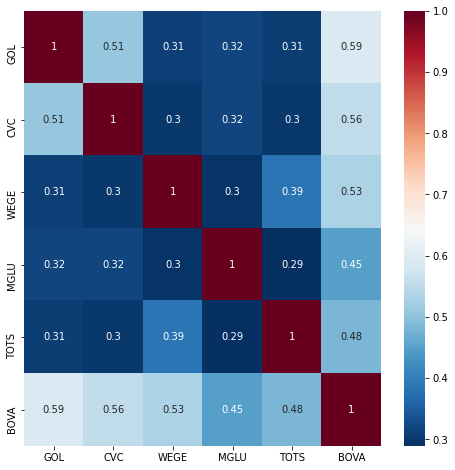

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True, cmap="RdBu_r");

## Risco de um portfólio

### Somente duas ações

In [ ]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1498,-0.003954,-0.046210,0.006960,0.020008,0.013445,-0.011183
1499,-0.020291,-0.050626,0.007818,-0.009615,-0.001327,-0.001855
1500,0.036920,0.033257,-0.002923,0.001553,-0.045500,0.000000
1501,0.068606,0.067703,-0.008118,0.015510,0.025052,0.008321


In [ ]:
taxas_retorno_gol_cvc = taxas_retorno[['GOL','CVC']]#.drop(columns = ['WEGE', 'MGLU', 'TOTS', 'BOVA'])
taxas_retorno_gol_cvc

,GOL,CVC
0,NaN,NaN
1,-0.009340,-0.013158
2,0.024242,-0.013333
3,-0.043392,-0.008784
4,-0.019244,-0.035447
...,...,...
1498,-0.003954,-0.046210
1499,-0.020291,-0.050626
1500,0.036920,0.033257
1501,0.068606,0.067703


In [ ]:
taxas_retorno_gol_cvc.cov()

,GOL,CVC
GOL,0.002631,0.000905
CVC,0.000905,0.001212


In [ ]:
taxas_retorno_gol_cvc.cov() * days_bolsa

,GOL,CVC
GOL,0.647183,0.222546
CVC,0.222546,0.298183


In [ ]:
pesos = np.array([0.5, 0.5])
assert pesos.sum() == 1.0

In [ ]:
np.dot(taxas_retorno_gol_cvc.cov() * days_bolsa, pesos)

array([0.43486474, 0.26036446])

In [ ]:
# variancia
np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * days_bolsa, pesos))

0.34761459904219427

In [ ]:
# desvio padrão (risco)
np.sqrt(np.dot(pesos, np.dot(taxas_retorno_gol_cvc.cov() * days_bolsa, pesos))) * 100

58.95884997540185

### Todas as ações

In [ ]:
list(dataset.columns)

['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA']

In [ ]:
taxas_retorno.cov() * days_bolsa

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
GOL,0.647183,0.222546,0.086933,0.168089,0.094337,0.127537
CVC,0.222546,0.298183,0.057720,0.113674,0.063174,0.081638
WEGE,0.086933,0.057720,0.122266,0.067496,0.051559,0.050115
MGLU,0.168089,0.113674,0.067496,0.427458,0.072382,0.079207
TOTS,0.094337,0.063174,0.051559,0.072382,0.146450,0.049696
BOVA,0.127537,0.081638,0.050115,0.079207,0.049696,0.072392


In [ ]:
carteira1 = {
    'GOL': 0.2,
    'CVC': 0.2,
    'WEGE': 0.2,
    'MGLU': 0.2,
    'TOTS': 0.2,
    'BOVA': 0.0
}

carteira2 = {
    'GOL': 0.1,
    'CVC': 0.2,
    'WEGE': 0.2,
    'MGLU': 0.4,
    'TOTS': 0.1,
    'BOVA': 0.0
}

indiceIbovespa = {
    'GOL': 0.0,
    'CVC': 0.0,
    'WEGE': 0.0,
    'MGLU': 0.0,
    'TOTS': 0.0,
    'BOVA': 1.0
}

assert sum(carteira1.values()) == 1.0
assert sum(carteira2.values()) == 1.0
assert sum(indiceIbovespa.values()) == 1.0

In [ ]:
pesosIguais = np.array(list(carteira1.values()))

variancia_portfolio1 = np.dot(pesosIguais, np.dot(taxas_retorno.cov()*days_bolsa, pesosIguais))
volatilidade_portfolio1 = np.sqrt(variancia_portfolio1)
volatilidade_portfolio1

0.3814372407366256

In [ ]:
np.dot(taxas_retorno.cov() * days_bolsa, pesosIguais)

array([0.24381783, 0.15105928, 0.07719471, 0.16981978, 0.08558025,
       0.07763848])

In [ ]:
pesosIndiceIbovespa = np.array(list(indiceIbovespa.values()))

varianciaIndiceIbovespa = np.dot(pesosIndiceIbovespa, np.dot(taxas_retorno.cov()*days_bolsa, pesosIndiceIbovespa))
volatilidadeIndiceIbovespa = np.sqrt(varianciaIndiceIbovespa)
volatilidadeIndiceIbovespa

0.2690584233826408

## Risco sistemático e não sistemático

- Risco sistemático: mudança diária no preço das ações, devido a eventos como recessão da economia, comportamento do cliente (eventos externos). Não pode ser eliminado e pode afetar todas as empresas
- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa)

In [ ]:
taxas_retorno

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011457,0.033380,-0.007070,0.033705
4,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...
1498,-0.003954,-0.046210,0.006960,0.020008,0.013445,-0.011183
1499,-0.020291,-0.050626,0.007818,-0.009615,-0.001327,-0.001855
1500,0.036920,0.033257,-0.002923,0.001553,-0.045500,0.000000
1501,0.068606,0.067703,-0.008118,0.015510,0.025052,0.008321


In [ ]:
dct_carteira1 = dict(zip(dataset.columns,pesosIguais))
dct_carteira1

{'BOVA': 0.0, 'CVC': 0.2, 'GOL': 0.2, 'MGLU': 0.2, 'TOTS': 0.2, 'WEGE': 0.2}

In [ ]:
dict(zip(dataset.columns,pesosIndiceIbovespa))

{'BOVA': 1.0, 'CVC': 0.0, 'GOL': 0.0, 'MGLU': 0.0, 'TOTS': 0.0, 'WEGE': 0.0}

In [ ]:
taxas_retorno.var() * days_bolsa

GOL     0.647183
CVC     0.298183
WEGE    0.122266
MGLU    0.427458
TOTS    0.146450
BOVA    0.072392
dtype: float64

In [ ]:
varianciaPesosCarteira1 = (taxas_retorno.var() * days_bolsa) * pesosIguais
varianciaPesosCarteira1

GOL     0.129437
CVC     0.059637
WEGE    0.024453
MGLU    0.085492
TOTS    0.029290
BOVA    0.000000
dtype: float64

In [ ]:
#TODO: check why first is positive
sub1 = 2*varianciaPesosCarteira1[0] - varianciaPesosCarteira1.sum()

sub1_ = varianciaPesosCarteira1[0] - varianciaPesosCarteira1[1] - varianciaPesosCarteira1[2] - varianciaPesosCarteira1[3] - varianciaPesosCarteira1[4] - varianciaPesosCarteira1[5]
assert np.allclose(sub1, sub1_)
sub1

-0.06943456527375391

In [ ]:
riscoNaoSistematico1 = (variancia_portfolio1 - sub1)
riscoNaoSistematico1

0.2149289338945244

In [ ]:
varianciaPesosIndiceIbovespa = (taxas_retorno.var() * days_bolsa) * pesosIndiceIbovespa
varianciaPesosIndiceIbovespa

GOL     0.000000
CVC     0.000000
WEGE    0.000000
MGLU    0.000000
TOTS    0.000000
BOVA    0.072392
dtype: float64

In [ ]:
subIndiceIbovespa = 2*varianciaPesosIndiceIbovespa[0] - varianciaPesosIndiceIbovespa.sum()
subIndiceIbovespa

-0.07239243519315239

In [ ]:
riscoNaoSistematicoIndiceIbovespa = (varianciaIndiceIbovespa - subIndiceIbovespa)
riscoNaoSistematicoIndiceIbovespa

0.14478487038630478

## Exercício

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  acoes_ex_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
acoes_ex_df.dropna(inplace=True)
acoes_ex_df = acoes_ex_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})
acoes_ex_df.to_csv('acoes_ex.csv')

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,15.030000,14.25,44.070000,27.700001,33.419998,113.180000
1499,2021-01-26,15.400000,14.35,44.830002,27.600000,32.790001,112.970001
1500,2021-01-27,15.400000,14.18,45.660000,27.980000,33.750000,112.970001
1501,2021-01-28,15.540000,14.53,45.709999,28.600000,34.540001,113.910004


In [ ]:
dataset.drop(columns=['Date'], inplace=True)
dataset.head()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,16.020000,9.37,37.820000,9.00,22.650000,47.259998
1,15.730000,9.62,37.070000,8.27,22.180000,46.320000
2,16.330000,9.55,36.150002,8.06,22.490000,46.580002
3,16.559999,9.69,37.389999,8.45,23.480000,48.150002
4,16.540001,9.66,38.910000,9.02,23.559999,48.509998


In [ ]:
taxas_retorno = (dataset / dataset.shift(1)) - 1
taxas_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477
...,...,...,...,...,...,...
1498,-0.037156,-0.012474,0.005705,-0.013884,-0.022235,-0.011183
1499,0.024617,0.007018,0.017245,-0.003610,-0.018851,-0.001855
1500,0.000000,-0.011847,0.018514,0.013768,0.029277,0.000000
1501,0.009091,0.024683,0.001095,0.022159,0.023407,0.008321


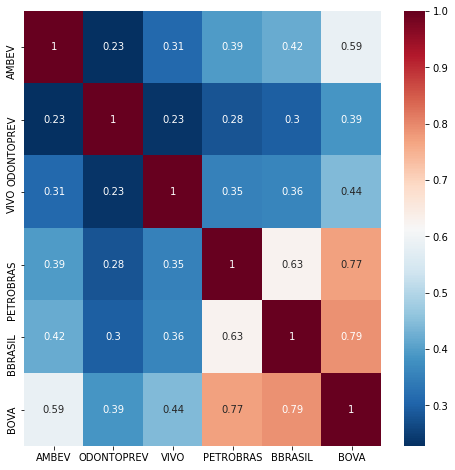

In [ ]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
plt.figure(figsize=(8,8))
sns.heatmap(taxas_retorno.corr(), annot=True, cmap="RdBu_r");

In [ ]:
taxas_retorno.std() * np.sqrt(days_bolsa) # Anualizado

AMBEV         0.275835
ODONTOPREV    0.315432
VIVO          0.317176
PETROBRAS     0.527692
BBRASIL       0.466421
BOVA          0.269058
dtype: float64

In [ ]:
variancia_portfolio2 = np.dot(pesosIguais, np.dot(taxas_retorno.cov()*days_bolsa, pesosIguais))
variancia_portfolio2
volatilidade_portfolio2 = np.sqrt(np.dot(pesosIguais, np.dot(taxas_retorno.cov()*days_bolsa, pesosIguais)))
volatilidade_portfolio2

0.27208463285574747

In [ ]:
dct_carteira2 = dict(zip(dataset.columns,pesosIguais))
dct_carteira2

{'AMBEV': 0.2,
 'BBRASIL': 0.2,
 'BOVA': 0.0,
 'ODONTOPREV': 0.2,
 'PETROBRAS': 0.2,
 'VIVO': 0.2}

In [ ]:
varianciaPesosCarteira2 = (taxas_retorno.var()*days_bolsa) * pesosIguais
sub2 = 2*varianciaPesosCarteira2[0] - varianciaPesosCarteira2.sum()
riscoNaoSistematico2 = (variancia_portfolio2 - sub2)
riscoNaoSistematico2

0.1980342604308903

Menos risco: volatilidade e risco não sistemático mais baixo.

In [ ]:
df_risco = pd.DataFrame(
    columns=["Portfólio","Risco Não Sistemático","Volatilidade"],
    data = [["Carteira 1", riscoNaoSistematico1, volatilidade_portfolio1],
            ["Carteira 2", riscoNaoSistematico2, volatilidade_portfolio2],
            ["IBOVESPA", riscoNaoSistematicoIndiceIbovespa, volatilidadeIndiceIbovespa]
            ])
df_risco


,Portfólio,Risco Não Sistemático,Volatilidade
0,Carteira 1,0.214929,0.381437
1,Carteira 2,0.198034,0.272085
2,IBOVESPA,0.144785,0.269058


In [ ]:
dct_carteira1

{'BOVA': 0.0, 'CVC': 0.2, 'GOL': 0.2, 'MGLU': 0.2, 'TOTS': 0.2, 'WEGE': 0.2}

In [ ]:
dct_carteira2

{'AMBEV': 0.2,
 'BBRASIL': 0.2,
 'BOVA': 0.0,
 'ODONTOPREV': 0.2,
 'PETROBRAS': 0.2,
 'VIVO': 0.2}

In [ ]:
df_bova.sort_values(by=df_bova.columns[-1], ascending=False).head(10)

,Código,Ação,Tipo,Qtde. Teórica (1),Part. (%) (2)
47,ITUB4,ITAUUNIBANCO,PN N1,4757466114,"6,868"
61,PETR4,PETROBRAS,PN N2,4566457037,"5,91"
2,B3SA3,B3,ON NM,1930877944,"5,418"
5,BBDC4,BRADESCO,PN EJ N1,4261649634,"5,282"
60,PETR3,PETROBRAS,ON N2,3307982840,"4,358"
0,ABEV3,AMBEV S/A,ON EJ,4355174839,"3,112"
54,MGLU3,MAGAZ LUIZA,ON EJ NM,2668955512,"3,041"
79,WEGE3,WEG,ON EJ NM,741148001,"2,563"
46,ITSA4,ITAUSA,PN N1,4515538171,"2,419"
3,BBAS3,BRASIL,ON NM,1283197221,"2,274"
